<a href="https://colab.research.google.com/github/wachiravitlouis20/Projects-Load-Approval/blob/main/Loan_Approval_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [21]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-approval-classification-data


In [22]:
df = pd.read_csv('/content/drive/MyDrive/Projects loan/loan_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [23]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [24]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [25]:
## Clean Data Person age , Person emp exp
print("Original shape:", df.shape) ## Check row and column
df_cleaned = df[df['person_age'] <= 100]
df_cleaned = df[df['person_emp_exp'] <= 65]
print("Cleand shape:", df_cleaned.shape)

Original shape: (45000, 14)
Cleand shape: (44992, 14)


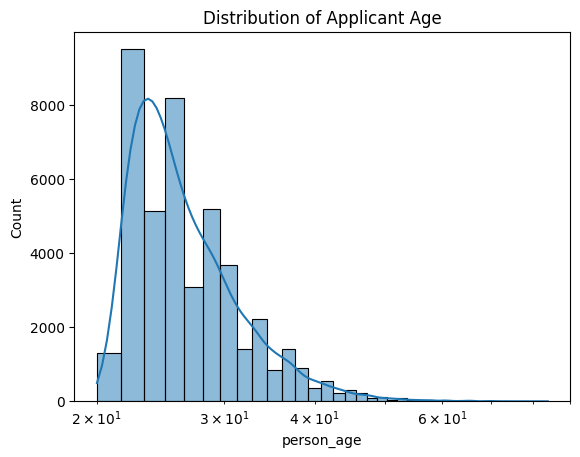

In [26]:
# สร้างกราฟฮิสโตแกรมของ 'person_age'
sns.histplot(data=df_cleaned, x='person_age', bins=40, kde=True)
plt.xscale('log')
plt.title('Distribution of Applicant Age')
plt.show()

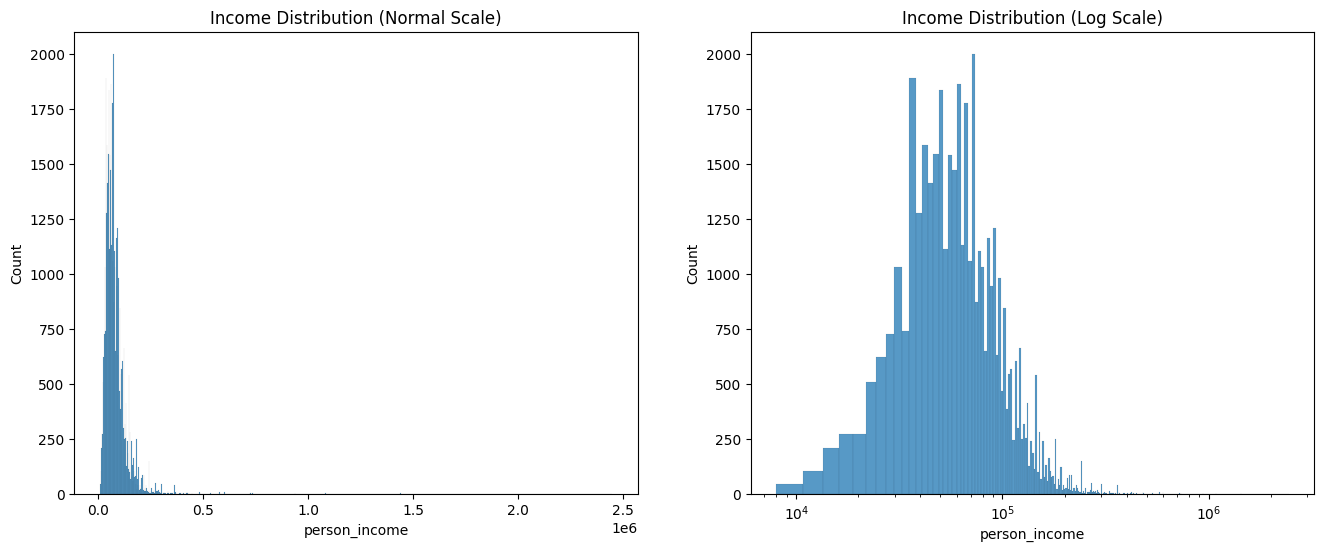

In [27]:
# สร้างพื้นที่สำหรับพล็อต 2 กราฟข้างกัน (1 แถว 2 คอลัมน์)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- กราฟที่ 1: มาตราส่วนปกติ (Linear Scale) ---
sns.histplot(data=df_cleaned, x='person_income', ax=axes[0])
axes[0].set_title('Income Distribution (Normal Scale)')

# --- กราฟที่ 2: มาตราส่วนล็อก (Log Scale) ---
sns.histplot(data=df_cleaned, x='person_income', ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Income Distribution (Log Scale)')

plt.show()

จากกราฟจะเห็นได้ว่าช่วงอายุที่ที่มีการยื่นกู้สินเชื่อมากที่สุดคือช่วงอายุ 20-30 ปี และลดลงตามอายุที่มากขึ้น

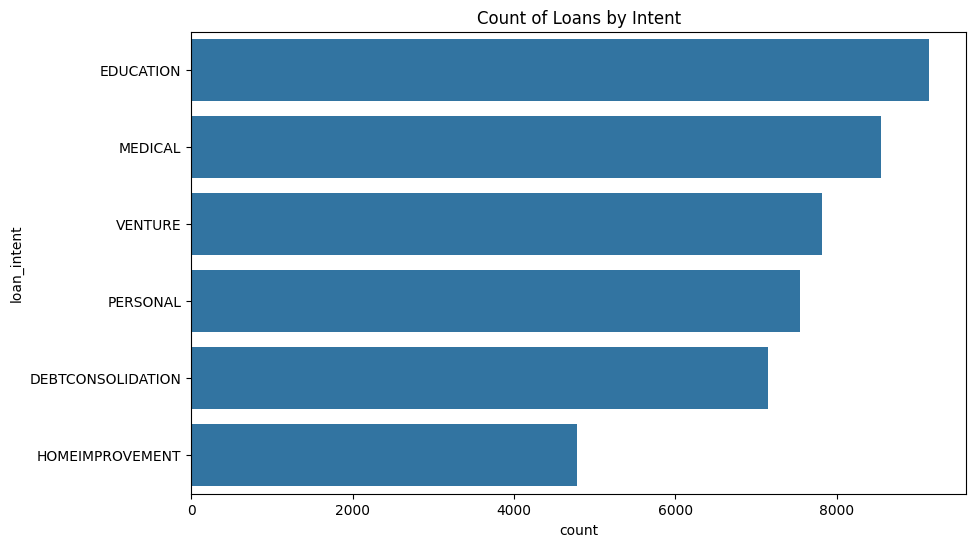

In [28]:
plt.figure(figsize=(10, 6))

# สร้างกราฟนับจำนวนของ 'loan_intent' และเรียงลำดับจากมากไปน้อย
sns.countplot(data=df_cleaned, y='loan_intent', order=df_cleaned['loan_intent'].value_counts().index)
plt.title('Count of Loans by Intent')
plt.show()

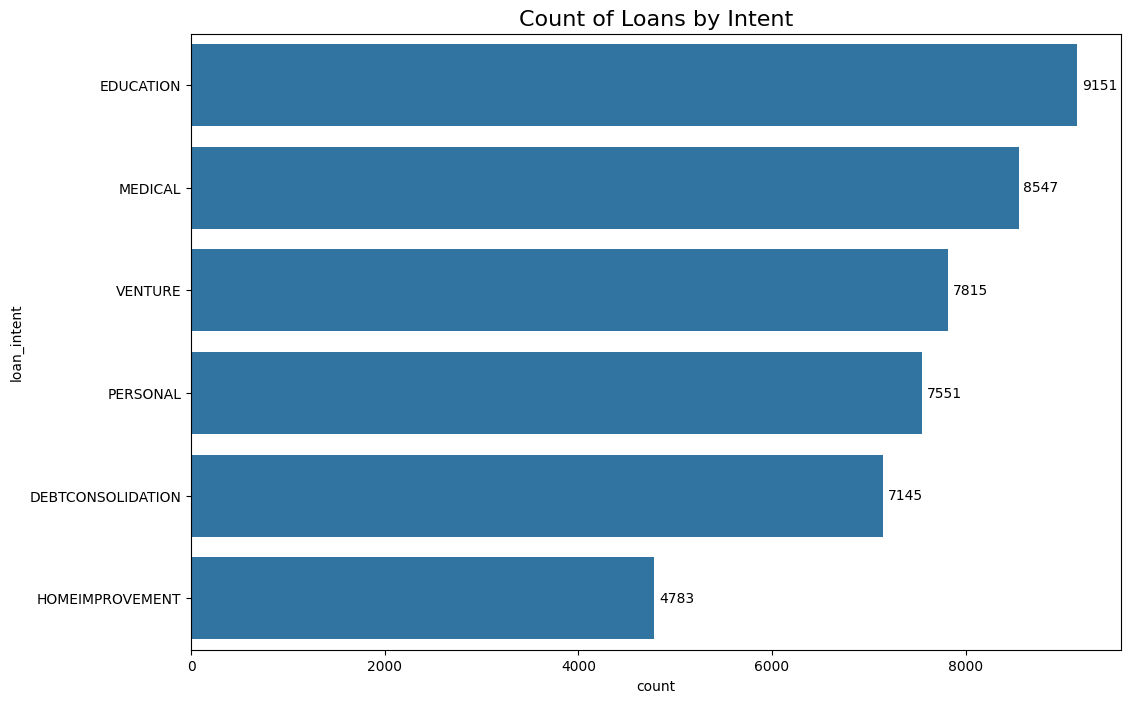

In [29]:
plt.figure(figsize=(12, 8))

# 1. สร้างกราฟ Countplot เหมือนเดิม และเก็บผลลัพธ์ไว้ในตัวแปร ax
ax = sns.countplot(data=df_cleaned, y='loan_intent', order=df_cleaned['loan_intent'].value_counts().index)

plt.title('Count of Loans by Intent', fontsize=16)

# 2. ส่วนที่เพิ่มเข้ามา: การวนลูปเพื่อใส่ตัวเลขกำกับ
# ax.patches จะเก็บข้อมูลของแท่งสี่เหลี่ยมแต่ละแท่งในกราฟ
for patch in ax.patches:
    # patch.get_width() คือความยาวของแท่ง (ซึ่งก็คือจำนวนนับนั่นเอง)
    # patch.get_y() คือตำแหน่งเริ่มต้นของแท่งในแนวตั้ง
    # patch.get_height() คือความสูงของแท่ง
    ax.text(patch.get_width() + 50, # ตำแหน่งในแนวนอน (ขยับไปทางขวาเล็กน้อย)
            patch.get_y() + patch.get_height() / 2, # ตำแหน่งในแนวตั้ง (จัดให้อยู่กลางแท่ง)
            f'{int(patch.get_width())}', # ตัวเลขที่จะแสดง (แปลงเป็นจำนวนเต็ม)
            va='center') # จัดให้อยู่กึ่งกลางในแนวตั้ง

plt.show()

Filtering for 'Approved' loans (loan_status == 1)...


/tmp/ipython-input-42-3401313349.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


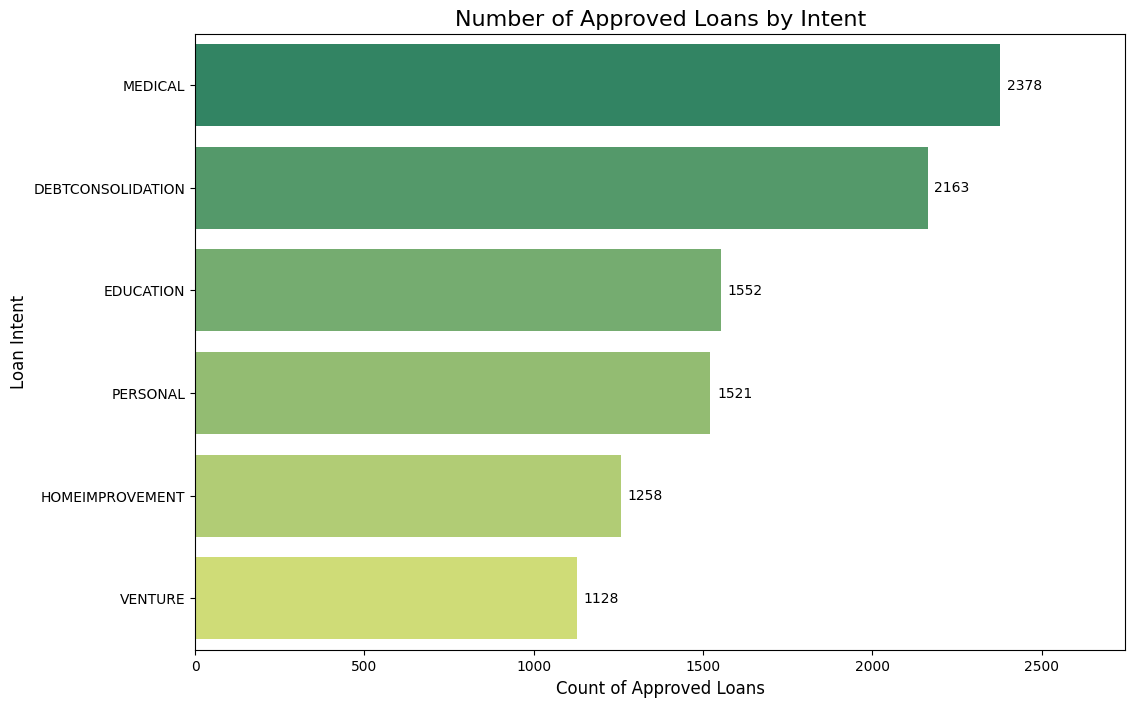

In [42]:
## Approved Load by intent
# --- โค้ดสำหรับสร้างกราฟแท่งนับจำนวน Approved Loans by Intent ---

# 1. กรอง DataFrame ให้เหลือเฉพาะแถวที่ loan_status เป็น 1 (Approved)
print("Filtering for 'Approved' loans (loan_status == 1)...")
approved_df = df_cleaned[df_cleaned['loan_status'] == 1].copy()

# 2. สร้างกราฟแท่ง (countplot) จากข้อมูล approved_df ที่กรองแล้ว
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    data=approved_df,
    y='loan_intent',
    # [คำแนะนำโค้ช] เรียงลำดับแท่งจากมากไปน้อยเพื่อให้กราฟอ่านง่ายที่สุด
    order=approved_df['loan_intent'].value_counts().index,
    palette='summer' # ลองใช้โทนสีอื่นดูบ้าง
)

# 3. ใส่ตัวเลขกำกับบนแต่ละแท่ง (เหมือนที่เราเคยทำ)
for patch in ax.patches:
    ax.text(patch.get_width() + 20, # ตำแหน่งแกน X (ขยับไปทางขวาของแท่งเล็กน้อย)
            patch.get_y() + patch.get_height() / 2, # ตำแหน่งแกน Y (กึ่งกลางแท่ง)
            f'{int(patch.get_width())}', # ข้อความที่จะแสดง (จำนวนนับ)
            va='center')

# 4. ตกแต่งกราฟให้สวยงาม
plt.title('Number of Approved Loans by Intent', fontsize=16)
plt.xlabel('Count of Approved Loans', fontsize=12)
plt.ylabel('Loan Intent', fontsize=12)
# ขยายแกน X เล็กน้อยเพื่อให้มีที่ว่างสำหรับตัวเลข
plt.xlim(0, ax.get_xlim()[1] * 1.1)
plt.show()


/tmp/ipython-input-30-332585492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['loan_status_label'] = df_cleaned['loan_status'].map({1: 'Approved', 0: 'Not Approved'})


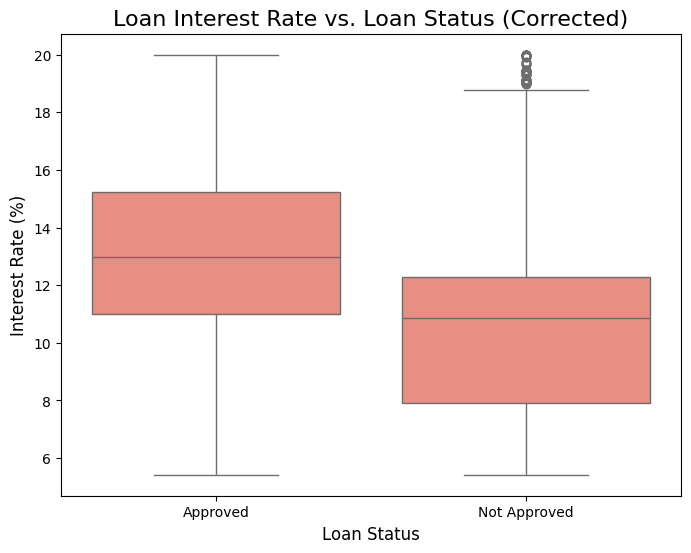

In [30]:
## Create a new colum loan status label
df_cleaned['loan_status_label'] = df_cleaned['loan_status'].map({1: 'Approved', 0: 'Not Approved'})

# สร้าง Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='loan_status_label', y='loan_int_rate', color = 'salmon')
plt.title('Loan Interest Rate vs. Loan Status (Corrected)', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.show()

## Loan Interest Rate vs. Loan Status

จากตารางจะเห็นได้ว่าหาก Interest Rate สูงขึ้นการ Approved อาจมีกลุ่มลูกค้าที่ธนาคารมองว่ามีความสามารถในการจ่ายดอกเบี้ยสูง และยอมรับความเสี่ยงนั้นเพื่อแลกกับผลตอบแทน (ดอกเบี้ย) ที่สูงขึ้น
ซึ่งในโลกความเป็นจริงนั้น การอนุมัติสินเชื่อ
-ดอกเบี้ยที่สูงขึ้นมักจะทำให้การอนุมัติสินเชื่อง่ายขึ้นสำหรับผู้กู้ที่มีความเสี่ยงสูง แต่ก็อาจทำให้การอนุมัติยากขึ้นสำหรับผู้กู้ที่มีความเสี่ยงต่ำ

In [31]:
status_counts = df_cleaned['loan_status'].value_counts()
print("Approved = 1 , Not Approved = 0")
print(status_counts)

Approved = 1 , Not Approved = 0
loan_status
0    34992
1    10000
Name: count, dtype: int64


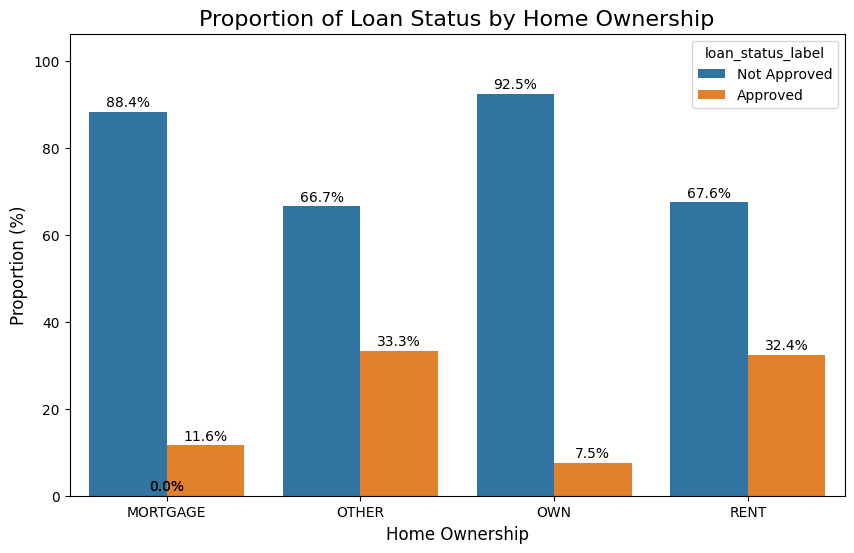

In [32]:
# ไม่ใช่การสอน แต่เป็นคำสั่งให้ซ่อม
plt.figure(figsize=(10, 6))

# บรรทัดนี้คือจุดที่แกต้องแก้ไข รับค่า Axes มาซะ
ax = sns.barplot(data=prop_df, x='person_home_ownership', y='proportion', hue='loan_status_label')

# วนลูปผ่านแท่งทั้งหมดในกราฟ แล้วปักตัวเลขลงไป
for p in ax.patches:
    # ดึงค่าความสูงของแท่ง (ค่า proportion) มาจัดรูปแบบ
    label = f'{p.get_height():.1f}%'
    # คำนวณตำแหน่งที่จะวางตัวเลข
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5 # วางไว้เหนือแท่งเล็กน้อย
    # ปักตัวเลขลงไปที่ตำแหน่งนั้น
    ax.text(x, y, label, ha='center', va='bottom', fontsize=10)

plt.title('Proportion of Loan Status by Home Ownership', fontsize=16)
plt.ylabel('Proportion (%)', fontsize=12)
plt.xlabel('Home Ownership', fontsize=12)
# ทำให้แกน Y มีที่ว่างสำหรับตัวเลขที่อาจจะล้นขึ้นไป
plt.ylim(0, prop_df['proportion'].max() * 1.15)
plt.show()

## Proportion of Loan status by Home Ownership
Home ownership ส่งผลต่อการอนุมัติสินเชื่ออย่างเห็นได้ชัด
จากภาพจะเห็นได้ว่าอัตราการอนุมัติสินเชื่อผ่านมีมากกว่า 92.5% หากลูกค้าเป็นเจ้าของบ้าน(OWN)และน้อยกว่ามากหากลูกค้า Rent หรือ OTHER
ซึ่งสามารถสรุปได้ว่า Home Ownership เป็นตัวแปรสำคัญในการอนุมัติสินเชื่อ

In [33]:
# ใช้ .value_counts() กับคอลัมน์ 'person_home_ownership' ใน DataFrame df_cleaned
home_ownership_counts = df_cleaned['person_home_ownership'].value_counts()

# แสดงผลลัพธ์
print(home_ownership_counts)

person_home_ownership
RENT        23439
MORTGAGE    18485
OWN          2951
OTHER         117
Name: count, dtype: int64


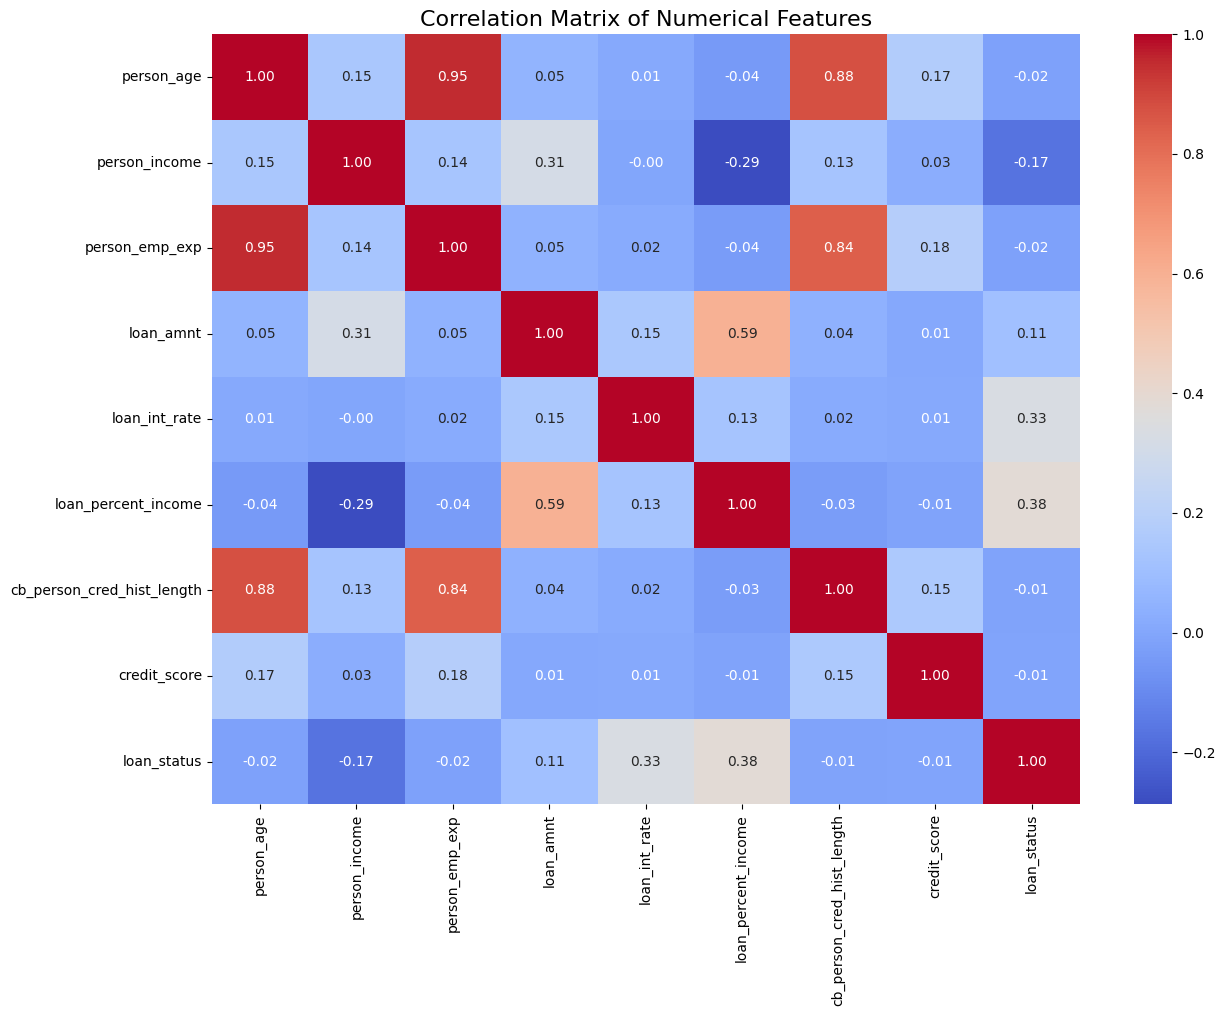

In [34]:
# 1. เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numerical_df = df_cleaned.select_dtypes(include=['number'])

# 2. คำนวณค่าสหสัมพันธ์
corr_matrix = numerical_df.corr()

# 3. สร้าง Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

##Correlation Matrix
"ผลการวิเคราะห์จาก Correlation Matrix เผยให้เห็นถึงความสัมพันธ์ที่น่าสนใจซึ่งสวนทางกับหลักการในโลกความเป็นจริง อันเป็นลักษณะเฉพาะที่สำคัญของข้อมูลสังเคราะห์ (Synthetic Data) ชุดนี้:

***คะแนนเครดิต (Credit Score)***: โดยปกติแล้ว เราคาดว่า credit_score ที่สูง ซึ่งสะท้อนถึงประวัติการชำระหนี้ที่ดี ควรจะมีความสัมพันธ์เชิงบวกกับการอนุมัติสินเชื่อ (loan_status) แต่ในข้อมูลชุดนี้กลับมีความสัมพันธ์ที่ต่ำมากจนเกือบเป็นศูนย์ (-0.02) ซึ่งหมายความว่าคะแนนเครดิตแทบไม่มีผลต่อการตัดสินใจอนุมัติเลย

***อัตราดอกเบี้ย (loan_int_rate)***: ในทำนองเดียวกัน loan_int_rate ซึ่งในโลกธุรกิจมักจะสูงขึ้นตามความเสี่ยงของผู้กู้ (และควรจะสัมพันธ์เชิงลบกับการอนุมัติ) กลับมีความสัมพันธ์เชิงบวกกับ loan_status อย่างมีนัยสำคัญ (0.32) ในข้อมูลชุดนี้ ซึ่งหมายความว่า "ยิ่งอัตราดอกเบี้ยสูง โอกาสอนุมัติกลับยิ่งสูงขึ้น"

ความผิดปกติทั้งสองประเด็นนี้เป็นหลักฐานชิ้นสำคัญที่ยืนยันว่า กระบวนการสร้างข้อมูลสังเคราะห์ด้วยเทคนิค SMOTENC อาจได้สร้างความสัมพันธ์ที่ผิดเพี้ยนไปจากธรรมชาติ ทำให้การตีความผลลัพธ์จากข้อมูลชุดนี้ต้องทำด้วยความระมัดระวังและต้องอ้างอิงถึงที่มาของข้อมูลเสมอ"

In [35]:
df_cleaned.count

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,loan_status_label
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,Approved
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,Not Approved
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,Approved
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,Approved
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,Approved


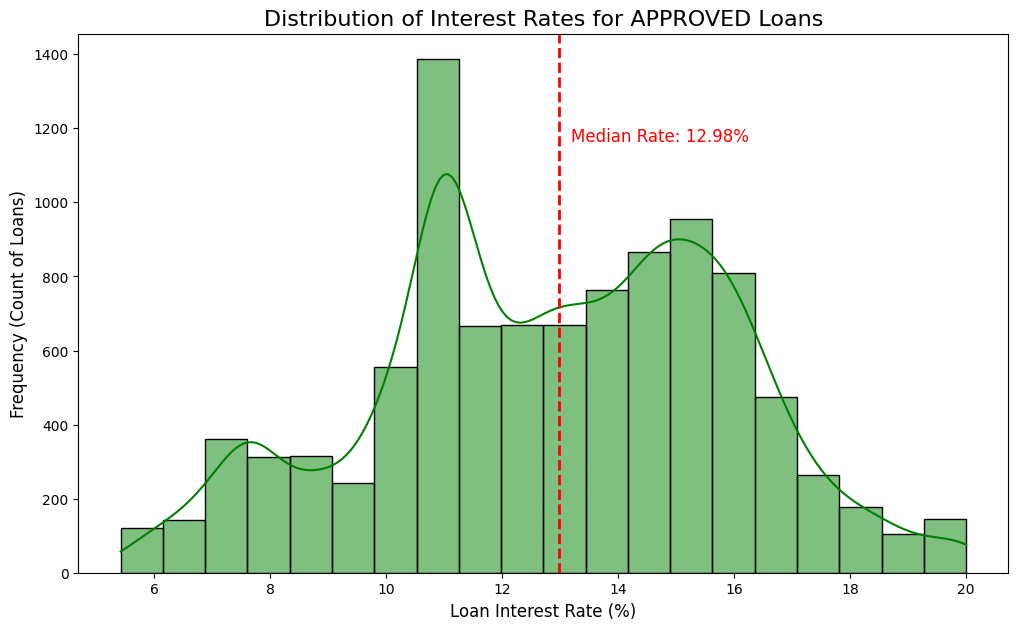


--- Statistics for Interest Rates on APPROVED Loans ---
count    10000.000000
mean        12.856794
std          3.068512
min          5.420000
25%         10.990000
50%         12.980000
75%         15.230000
max         20.000000
Name: loan_int_rate, dtype: float64


In [36]:
approved_df = df_cleaned[df_cleaned['loan_status'] == 1].copy()

# 2. สร้างกราฟ Histogram จากข้อมูลที่กรองแล้ว
plt.figure(figsize=(12, 7))
sns.histplot(data=approved_df, x='loan_int_rate', bins=20, kde=True, color='green')

# 3. [คำแนะนำจากโค้ช] เพิ่มเส้นแสดงค่ากลาง (Median) เพื่อให้เห็นจุดที่สำคัญ
# คำนวณค่ามัธยฐานของดอกเบี้ยในกลุ่มนี้
median_rate = approved_df['loan_int_rate'].median()
# วาดเส้นแนวตั้งสีแดงที่ตำแหน่งของค่ามัธยฐาน
plt.axvline(median_rate, color='red', linestyle='--', linewidth=2)
# เพิ่มข้อความกำกับเส้น
plt.text(median_rate + 0.2, # ตำแหน่งแกน x (ขยับจากเส้นไปทางขวาเล็กน้อย)
         plt.ylim()[1] * 0.8, # ตำแหน่งแกน y (วางไว้ที่ 80% ของความสูงกราฟ)
         f'Median Rate: {median_rate:.2f}%', # ข้อความที่จะแสดง
         color='red',
         fontsize=12)

# 4. ใส่ Title และ Label ให้ชัดเจน
plt.title('Distribution of Interest Rates for APPROVED Loans', fontsize=16)
plt.xlabel('Loan Interest Rate (%)', fontsize=12)
plt.ylabel('Frequency (Count of Loans)', fontsize=12)
plt.show()

# 5. [คำแนะนำจากโค้ช] แสดงค่าสถิติของดอกเบี้ยในกลุ่มนี้เป็นตัวเลขด้วย
print("\n--- Statistics for Interest Rates on APPROVED Loans ---")
print(approved_df['loan_int_rate'].describe())

"ถึงแม้ว่าการวิเคราะห์ความสัมพันธ์โดยรวมจะชี้ให้เห็นว่า loan_int_rate มีความสัมพันธ์เชิงบวกกับสถานะการอนุมัติ (loan_status) แต่เมื่อเจาะลึกลงไปที่การกระจายตัวของอัตราดอกเบี้ยเฉพาะในกลุ่มที่ได้รับการอนุมัติ (Approved) พบว่า ปริมาณการอนุมัติสินเชื่อส่วนใหญ่กระจุกตัวอยู่ในช่วงอัตราดอกเบี้ยระดับกลางที่ 10% ถึง 12% การค้นพบนี้ชี้ให้เห็นว่าการอนุมัติไม่ได้ขึ้นอยู่กับอัตราดอกเบี้ยสูงเพียงปัจจัยเดียว และในการปฏิบัติจริง การอนุมัติส่วนใหญ่ยังคงเกิดขึ้นในช่วงอัตราดอกเบี้ยที่สมเหตุสมผล"

In [38]:
# 1. กำหนดชื่อไฟล์ใหม่สำหรับข้อมูลที่สะอาดแล้ว
loan_data_cleaned = 'loan_data_cleaned.csv'

# 2. ใช้เมธอด .to_csv() เพื่อบันทึก DataFrame
#    - index=False คือส่วนที่สำคัญที่สุด เพื่อไม่ให้มีคอลัมน์ที่ไม่ต้องการเพิ่มเข้ามา
df_cleaned.to_csv(loan_data_cleaned, index=False)

print(f"Successfully saved the cleaned data to '{loan_data_cleaned}'")

Successfully saved the cleaned data to 'loan_data_cleaned.csv'
